In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0, parse_dates=True)
df.head()

<ipython-input-4-fdbc22fb2021>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0, parse_dates=True)


,Segment,Market,Sales,Profit
Order Date,,,,
2012-07-31,Consumer,US,2309.650,762.1845
2013-05-02,Corporate,APAC,3709.395,-288.7650
2013-10-17,Consumer,APAC,5175.171,919.9710
2013-01-28,Home Office,EU,2892.510,-96.5400
2013-05-11,Consumer,Africa,2832.960,311.5200


Trends

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-11-68382abc7adc>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0, parse_dates=True)


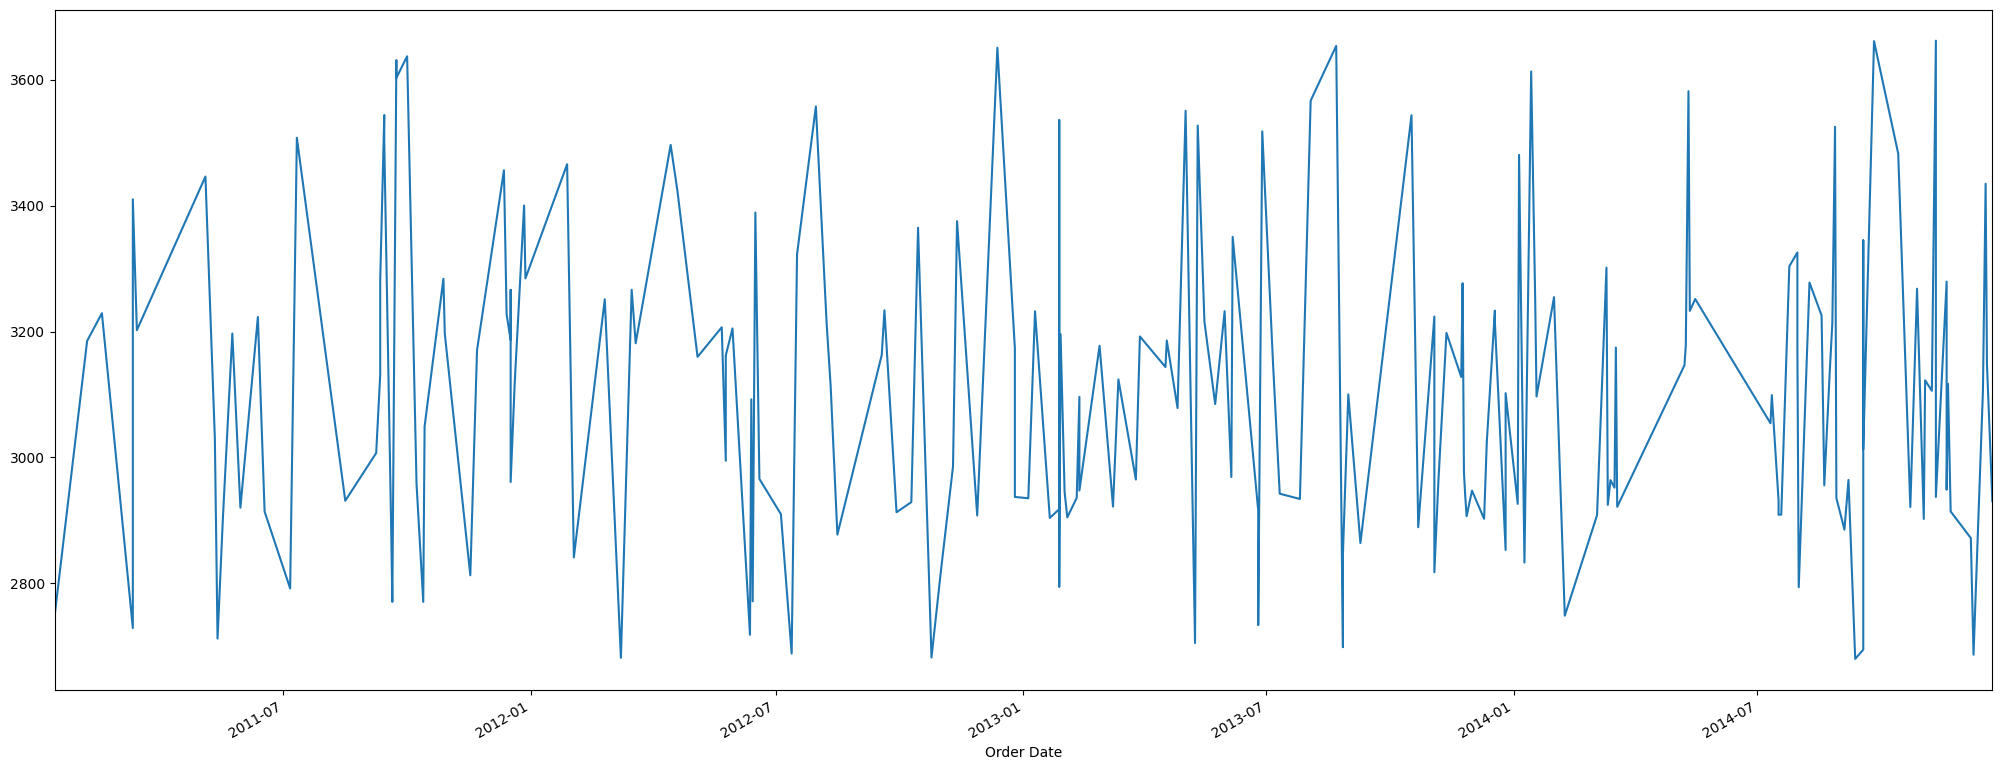

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0, parse_dates=True)
sample_size = 200
df_sample = df.iloc[:sample_size]
Sales_cycle, Sales_trend = hpfilter(df_sample['Sales'], lamb=3000)
Sales_trend.plot(figsize=(25, 10)).autoscale(axis='x', tight=True)


Pandas Differencing

<ipython-input-12-a82133ff11a4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-12-a82133ff11a4>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  series= pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0,parse_dates=True)


Text(0, 0.5, 'Sales')

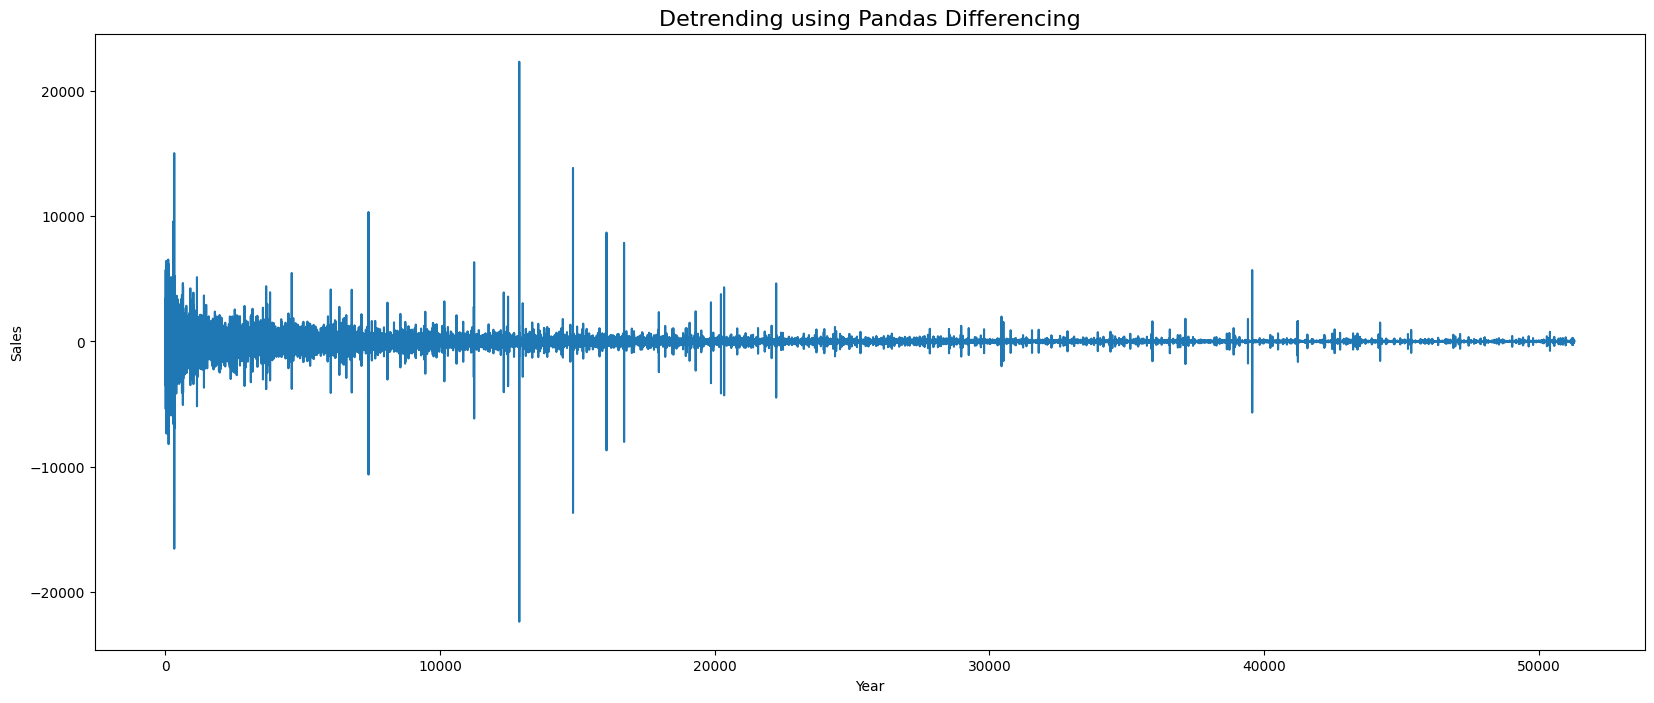

In [ ]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
series= pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0,parse_dates=True)
X= series['Sales']
diff= list()
for i in range(1, len(X)):
  value= X[i] -X[i-1]
  diff.append(value)
pyplot.figure(figsize=(20,8))
pyplot.plot(diff)
pyplot.title('Detrending using Pandas Differencing', fontsize=16)
pyplot.xlabel('Year')
pyplot.ylabel('Sales')

Scipy Signal

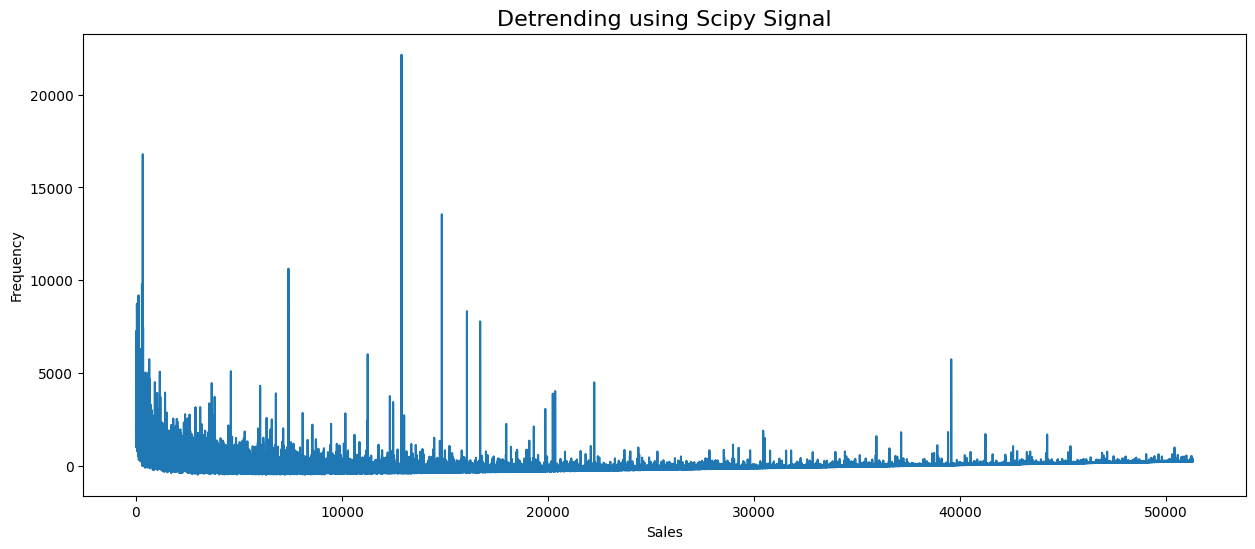

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df= pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0,parse_dates=True)
detrended= signal.detrend(df.Sales.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

box plot

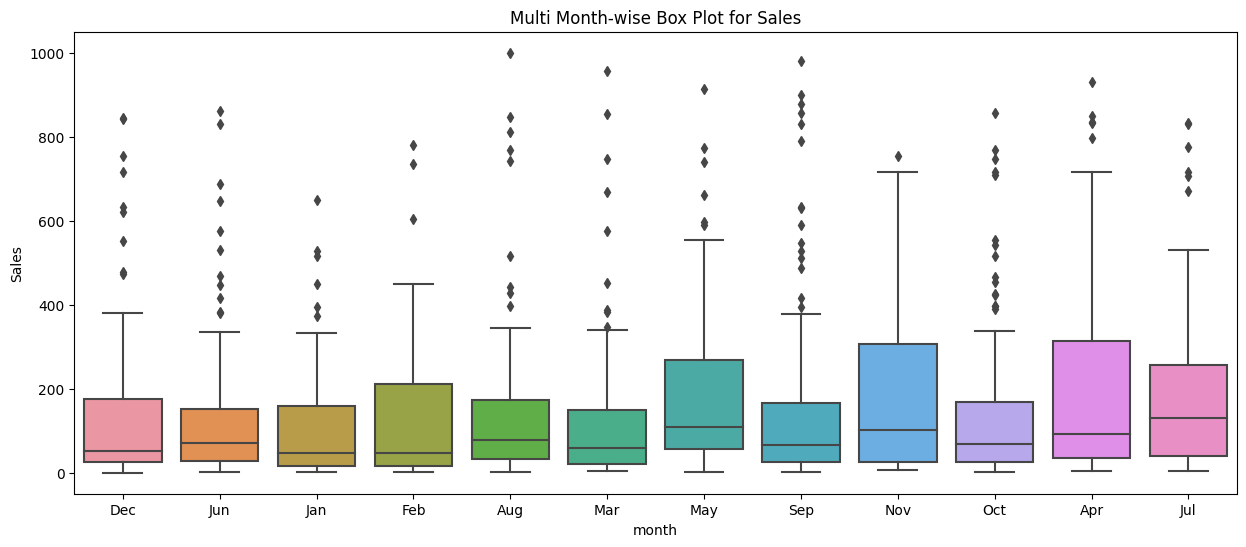

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', parse_dates=True)
sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42)
df_sample = df_sample[df_sample['Sales'] <= 1000]
df_sample['Order Date'] = pd.to_datetime(df_sample['Order Date'])
df_sample['month'] = df_sample['Order Date'].dt.strftime('%b')
df_sample['year'] = df_sample['Order Date'].dt.year
plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='Sales', data=df_sample)
plt.title("Multi Month-wise Box Plot for Sales")
plt.show()


Autocorrelation  plot

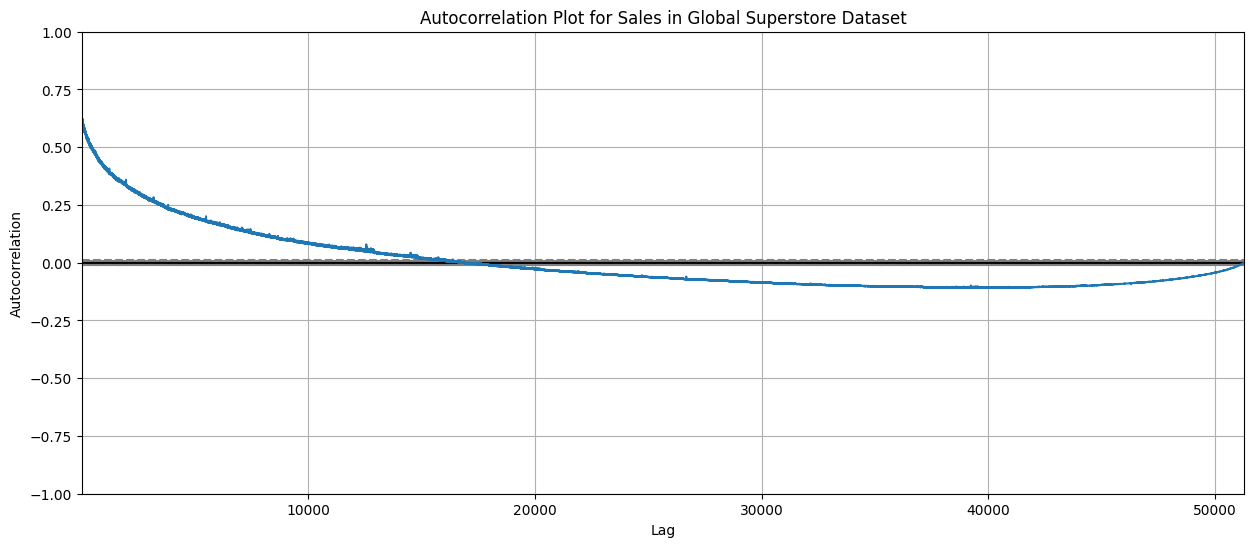

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', parse_dates=True, index_col=0)
time_series = df['Sales']
plt.rcParams.update({'figure.figsize': (15, 6)})
autocorrelation_plot(time_series.tolist())
plt.title("Autocorrelation Plot for Sales in Global Superstore Dataset")
plt.show()

Cyclic variations

<Figure size 1500x600 with 0 Axes>

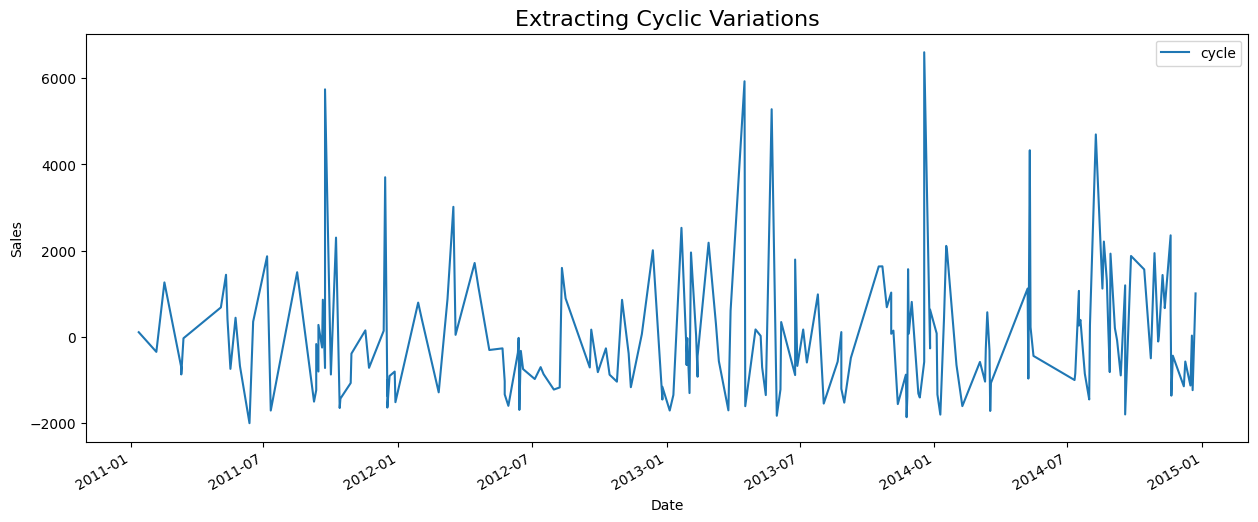

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', parse_dates=True, index_col=0)
sample_size = 200
df_sample = df.iloc[:sample_size]
Sales_cycle, Sales_trend = hpfilter(df_sample['Sales'], lamb=1600)
df_sample['cycle'] = Sales_cycle
df_sample['trend'] = Sales_trend
plt.figure(figsize=(15, 6))
df_sample[['cycle']].plot()
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

Preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv')
df.head(5)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [ ]:
df[(df['Sales'] >=3000) & (df['Sales'] <=5000)]

,Order Date,Segment,Market,Sales,Profit
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
9,28-01-2012,Consumer,US,4297.644,-1862.3124
10,05-04-2011,Corporate,US,4164.050,83.2810
11,19-04-2012,Corporate,APAC,4626.150,647.5500
14,06-06-2013,Consumer,APAC,3701.520,1036.0800
...,...,...,...,...,...
13013,02-04-2011,Consumer,APAC,3195.000,1150.2000
19864,20-08-2014,Consumer,APAC,3410.820,136.2600
20228,17-09-2012,Consumer,US,4228.704,158.5764
20343,04-06-2014,Corporate,EU,4363.350,305.4000


In [ ]:
df['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [ ]:
df[df.Market.isin(['US','EU','EMEA'])]

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
3,28-01-2013,Home Office,EU,2892.510,-96.5400
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124
10,05-04-2011,Corporate,US,4164.050,83.2810
...,...,...,...,...,...
51276,09-06-2014,Corporate,US,1.624,-4.4660
51277,25-12-2012,Consumer,US,17.940,8.0730
51280,29-11-2014,Home Office,EMEA,34.128,-49.5720
51286,20-06-2014,Consumer,US,0.444,-1.1100


In [ ]:
df[~df.Market.isin(['US','EU','EMEA'])]

,Order Date,Segment,Market,Sales,Profit
1,05-02-2013,Corporate,APAC,3709.395,-288.765
2,17-10-2013,Consumer,APAC,5175.171,919.971
4,05-11-2013,Consumer,Africa,2832.960,311.520
5,28-06-2013,Corporate,APAC,2862.675,763.275
6,07-11-2011,Consumer,APAC,1822.080,564.840
...,...,...,...,...,...
51283,30-05-2014,Corporate,APAC,26.940,1.860
51284,05-08-2014,Home Office,APAC,58.050,19.950
51285,19-06-2014,Corporate,APAC,65.100,4.500
51288,18-02-2012,Home Office,LATAM,13.440,2.400


In [ ]:
df.sort_values(by= ['Profit','Order Date'], ascending= True)

,Order Date,Segment,Market,Sales,Profit
171,26-11-2013,Consumer,US,4499.985,-6599.9780
6591,26-09-2013,Corporate,EMEA,3085.344,-4088.3760
37,05-11-2014,Corporate,US,7999.980,-3839.9904
1341,26-07-2011,Consumer,US,2177.584,-3701.8928
2347,18-04-2014,Home Office,US,2549.985,-3399.9800
...,...,...,...,...,...
45,23-09-2011,Consumer,US,9449.950,4630.4755
122,18-12-2013,Consumer,US,9892.740,4946.3700
290,18-11-2014,Consumer,US,10499.970,5039.9856
14843,24-03-2014,Consumer,US,13999.960,6719.9808


In [ ]:
df.sort_values(by= ['Profit','Order Date'], ascending= False)

,Order Date,Segment,Market,Sales,Profit
329,03-10-2013,Corporate,US,17499.950,8399.9760
14843,24-03-2014,Consumer,US,13999.960,6719.9808
290,18-11-2014,Consumer,US,10499.970,5039.9856
122,18-12-2013,Consumer,US,9892.740,4946.3700
45,23-09-2011,Consumer,US,9449.950,4630.4755
...,...,...,...,...,...
2347,18-04-2014,Home Office,US,2549.985,-3399.9800
1341,26-07-2011,Consumer,US,2177.584,-3701.8928
37,05-11-2014,Corporate,US,7999.980,-3839.9904
6591,26-09-2013,Corporate,EMEA,3085.344,-4088.3760


In [ ]:
df.agg({'Sales': ['count','min', 'max', 'mean']})

,Sales
count,51290.000000
min,0.444000
max,22638.480000
mean,246.490581


In [ ]:
df.groupby('Market')['Sales'].sum()

Market
APAC      3.585744e+06
Africa    7.837732e+05
Canada    6.692817e+04
EMEA      8.061613e+05
EU        2.938089e+06
LATAM     2.164605e+06
US        2.297201e+06
Name: Sales, dtype: float64

In [ ]:
df.groupby('Market').agg({'Profit':['mean','min','max']})

Profit                    
             mean       min       max
Market                               
APAC    39.629163 -3009.435  2939.310
Africa  19.374674 -1576.824  2597.280
Canada  46.399453     0.000  1159.020
EMEA     8.728966 -4088.376  1622.880
EU      37.282974 -3059.820  3979.080
LATAM   21.531328 -1806.240  1313.280
US      28.656896 -6599.978  8399.976

In [ ]:

df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [ ]:
df['Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Date', inplace=True)
df_2011 = df['2011']
monthly_mean_2011 = df_2011['Sales'].resample('M').mean()
df.Sales.resample('M').mean()

Date
2011-01-31    222.610790
2011-02-28    252.752698
2011-03-31    262.565993
2011-04-30    210.856744
2011-05-31    263.606265
2011-06-30    236.377578
2011-07-31    241.842832
2011-08-31    268.656244
2011-09-30    265.596147
2011-10-31    278.848881
2011-11-30    239.614597
2011-12-31    256.906826
2012-01-31    258.824950
2012-02-29    245.041977
2012-03-31    244.670786
2012-04-30    260.013817
2012-05-31    239.562539
2012-06-30    233.855321
2012-07-31    230.679931
2012-08-31    273.584754
2012-09-30    235.383351
2012-10-31    257.611517
2012-11-30    211.667751
2012-12-31    256.566198
2013-01-31    259.045415
2013-02-28    253.398902
2013-03-31    257.307807
2013-04-30    259.090387
2013-05-31    262.735085
2013-06-30    240.424485
2013-07-31    221.867715
2013-08-31    242.241292
2013-09-30    219.100047
2013-10-31    241.395778
2013-11-30    256.900880
2013-12-31    260.157960
2014-01-31    249.549323
2014-02-28    240.314276
2014-03-31    256.620641
2014-04-30    238.46

In [ ]:
df.Sales.resample('Q').mean()

Date
2011-03-31    245.944046
2011-06-30    236.230309
2011-09-30    260.112828
2011-12-31    257.121466
2012-03-31    249.070700
2012-06-30    242.769305
2012-09-30    247.492618
2012-12-31    239.694108
2013-03-31    256.669294
2013-06-30    252.689378
2013-09-30    227.890679
2013-12-31    253.754396
2014-03-31    249.607021
2014-06-30    234.556659
2014-09-30    253.827255
2014-12-31    243.850344
Freq: Q-DEC, Name: Sales, dtype: float64

In [ ]:
df.Sales.resample('Y').mean()

Date
2011-12-31    251.105901
2012-12-31    244.247281
2013-12-31    246.811106
2014-12-31    245.272139
Freq: A-DEC, Name: Sales, dtype: float64

In [ ]:
df.Sales.resample('W').mean()

Date
2011-01-02    141.923174
2011-01-09    227.008936
2011-01-16    251.123989
2011-01-23    227.074337
2011-01-30    147.471429
                 ...    
2014-12-07    218.689436
2014-12-14    228.451578
2014-12-21    230.742766
2014-12-28    258.434559
2015-01-04    214.781548
Freq: W-SUN, Name: Sales, Length: 210, dtype: float64

In [ ]:
df.Sales.resample('SM').mean()

Date
2010-12-31    235.227571
2011-01-15    184.886194
2011-01-31    251.218887
2011-02-15    271.056720
2011-02-28    248.100066
                 ...    
2014-10-31    244.438480
2014-11-15    266.412491
2014-11-30    222.554586
2014-12-15    239.949520
2014-12-31    213.837973
Freq: SM-15, Name: Sales, Length: 97, dtype: float64

Windowing function

In [ ]:
df.rolling(window=4).mean().head(10)

,Sales,Profit
Date,,
2012-07-31,NaN,NaN
2013-05-02,NaN,NaN
2013-10-17,NaN,NaN
2013-01-28,3521.68150,324.212625
2013-05-11,3652.50900,211.546500
2013-06-28,3440.82900,474.556500
2011-07-11,2602.55625,385.773750
2012-04-14,3190.63875,659.028750
2014-10-14,3753.38875,1057.770000


In [ ]:
df.expanding(min_periods=4).mean().head(10)

,Sales,Profit
Date,,
2012-07-31,NaN,NaN
2013-05-02,NaN,NaN
2013-10-17,NaN,NaN
2013-01-28,3521.681500,324.212625
2013-05-11,3383.937200,321.674100
2013-06-28,3297.060167,395.274250
2011-07-11,3086.348714,419.497929
2012-04-14,3356.160125,491.620687
2014-10-14,3548.137889,648.827833


In [ ]:
df.ewm(com=0.5).mean().head(10)

,Sales,Profit
Date,,
2012-07-31,2309.650000,762.184500
2013-05-02,3359.458750,-26.027625
2013-10-17,4616.490308,628.894500
2013-01-28,3452.803600,139.226213
2013-05-11,3037.866975,254.563376
2013-06-28,2920.911893,594.170312
2011-07-11,2188.022186,574.607826
2012-04-14,4226.211381,855.898815
2014-10-14,4798.072847,1556.325190


Shifting

In [ ]:
df.shift(periods=3).head(7)

,Order Date,Segment,Market,Sales,Profit
Date,,,,,
2012-07-31,None,None,None,NaN,NaN
2013-05-02,None,None,None,NaN,NaN
2013-10-17,None,None,None,NaN,NaN
2013-01-28,31-07-2012,Consumer,US,2309.650,762.1845
2013-05-11,05-02-2013,Corporate,APAC,3709.395,-288.7650
2013-06-28,17-10-2013,Consumer,APAC,5175.171,919.9710
2011-07-11,28-01-2013,Home Office,EU,2892.510,-96.5400


In [ ]:
df.shift(periods=-1).head(7)

,Order Date,Segment,Market,Sales,Profit
Date,,,,,
2012-07-31,05-02-2013,Corporate,APAC,3709.395,-288.765
2013-05-02,17-10-2013,Consumer,APAC,5175.171,919.971
2013-10-17,28-01-2013,Home Office,EU,2892.510,-96.540
2013-01-28,05-11-2013,Consumer,Africa,2832.960,311.520
2013-05-11,28-06-2013,Corporate,APAC,2862.675,763.275
2013-06-28,07-11-2011,Consumer,APAC,1822.080,564.840
2011-07-11,14-04-2012,Consumer,APAC,5244.840,996.480


In [ ]:
df.shift(periods=3, axis=1).head(7)

,Order Date,Segment,Market,Sales,Profit
Date,,,,,
2012-07-31,None,None,None,31-07-2012,Consumer
2013-05-02,None,None,None,05-02-2013,Corporate
2013-10-17,None,None,None,17-10-2013,Consumer
2013-01-28,None,None,None,28-01-2013,Home Office
2013-05-11,None,None,None,05-11-2013,Consumer
2013-06-28,None,None,None,28-06-2013,Corporate
2011-07-11,None,None,None,07-11-2011,Consumer


In [ ]:
df.shift(periods=3,fill_value=0).head(7)

,Order Date,Segment,Market,Sales,Profit
Date,,,,,
2012-07-31,0,0,0,0.000,0.0000
2013-05-02,0,0,0,0.000,0.0000
2013-10-17,0,0,0,0.000,0.0000
2013-01-28,31-07-2012,Consumer,US,2309.650,762.1845
2013-05-11,05-02-2013,Corporate,APAC,3709.395,-288.7650
2013-06-28,17-10-2013,Consumer,APAC,5175.171,919.9710
2011-07-11,28-01-2013,Home Office,EU,2892.510,-96.5400


Handling missing values

In [ ]:
df.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [ ]:
df.interpolate(method='linear',limit_direction='forward')

,Order Date,Segment,Market,Sales,Profit
Date,,,,,
2012-07-31,31-07-2012,Consumer,US,2309.650,762.1845
2013-05-02,05-02-2013,Corporate,APAC,3709.395,-288.7650
2013-10-17,17-10-2013,Consumer,APAC,5175.171,919.9710
2013-01-28,28-01-2013,Home Office,EU,2892.510,-96.5400
2013-05-11,05-11-2013,Consumer,Africa,2832.960,311.5200
...,...,...,...,...,...
2014-06-19,19-06-2014,Corporate,APAC,65.100,4.5000
2014-06-20,20-06-2014,Consumer,US,0.444,-1.1100
2013-02-12,02-12-2013,Home Office,US,22.920,11.2308


Smoothening

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
#Making a copy of the data for Close column for train/split
X = df['Sales']
test = X.iloc[-30:] #Data expected for last 30 days
train = X.iloc[:-30] #Last 30 days to evaluate prediction

In [ ]:
#Function for calculating evaluation metrics to understand how far off our forecasts are against the actuals
#Closer to 0 better the model
#RMSE and MAPE are notable statistics measures used to check the accurcy of forecasting model.

def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 5179834.713189868
MAE is : 2275.6108000000004
RMSE is : 2275.925023631022
MAPE is : 39664.7861853591
R2 is : -3620.755211236609

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 1694.679421032374
MAE is : 23.93120659957403
RMSE is : 41.166484195670314
MAPE is : 267.6538428907804
R2 is : -0.18492468666431372

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 1753.1252917335473
MAE is : 24.500306348476247
RMSE is : 41.87033904488412
MAPE is : 245.14896704285118
R2 is : -0.22579020622389057

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 1733.451460663376
MAE is : 24.31497115179202
RMSE is : 41.63473862849839
MAPE is : 252.47799082062602
R2 is : -0.21203420740370782

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 1699.685967941801
MAE is : 23.982274775773053
RMSE is : 41.227247882217426
MAPE is : 265.6343674519735
R2 is : -0.18842527854

,smoothing parameter,RMSE
10,1.0,38.495256
9,0.9,38.986974
8,0.8,39.461408
7,0.7,39.908484
6,0.6,40.343999
5,0.5,40.784712
1,0.1,41.166484
4,0.4,41.227248
3,0.3,41.634739
2,0.2,41.870339


In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 1.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 1481.8847098666668
MAE is : 23.83893333333333
RMSE is : 38.49525567997525
MAPE is : 402.6926614066059
R2 is : -0.036138017443863024



In [ ]:

#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 1633.7039497392732
MAE is : 23.619751805783377
RMSE is : 40.41910377209363
MAPE is : 295.9315041130443
R2 is : -0.1422904631530777



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,51260
Model:,SimpleExpSmoothing,SSE,4670641685.857
Optimized:,True,AIC,585387.885
Trend:,None,BIC,585405.574
Seasonal:,None,AICC,585387.885
Seasonal Periods:,None,Date:,"Mon, 04 Dec 2023"
Box-Cox:,False,Time:,08:08:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0165116,alpha,True
initial_level,2309.6500,l.0,False


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(51261, 51291)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(51261, 51291)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

# Selecting the last 500 data points for each series
train_last_500 = train.tail(500)
test_last_500 = test.tail(500)
df_fcst_auto_pred_last_500 = df_fcst_auto_pred.tail(500)
df_fcst_gs_pred_last_500 = df_fcst_gs_pred.tail(500)

# Plotting only the last 500 data points
plt.plot(train_last_500, label='Train')
plt.plot(test_last_500, label='Test')
plt.plot(df_fcst_auto_pred_last_500, label='SES Optimized')
plt.plot(df_fcst_gs_pred_last_500, label='SES Custom Grid Search')
plt.legend(loc='best')
plt.show()


Conclusion: the simple exponential we are not getting the solution accurately i.e similar to test data so we use double exponential

Double smoothening


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df['Sales'] = df['Sales']

In [ ]:
train = df.Sales[0:-30]
test = df.Sales[-30:]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
#dampening - decreasing future time trends on a straight line(no trend)
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Streaming output truncated to the last 5000 lines.
51276    17.599162
51277    17.921844
51278    18.244527
51279    18.567209
51280    18.889891
51281    19.212574
51282    19.535256
51283    19.857939
51284    20.180621
51285    20.503303
51286    20.825986
51287    21.148668
51288    21.471351
51289    21.794033
dtype: float64
 RMSE is 41.77358428396163
0.2 0.3 0.8 False
51260    16.935272
51261    18.641238
51262    20.347204
51263    22.053170
51264    23.759136
51265    25.465102
51266    27.171068
51267    28.877034
51268    30.583000
51269    32.288966
51270    33.994932
51271    35.700898
51272    37.406864
51273    39.112831
51274    40.818797
51275    42.524763
51276    44.230729
51277    45.936695
51278    47.642661
51279    49.348627
51280    51.054593
51281    52.760559
51282    54.466525
51283    56.172491
51284    57.878457
51285    59.584423
51286    61.290389
51287    62.996355
51288    64.702321
51289    66.408287
dtype: float64
 RMSE is 42.607950513255595
0.2 0.4 0.

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.9, damping_slope = 0.4 ,optimized=False)

In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
df_fcst_auto_pred = df_fcst_auto_pred.reset_index(drop=True)
df_fcst_gs_pred = df_fcst_gs_pred.reset_index(drop=True)
train = train[-1200:]
test = test[-1200:]
df_fcst_auto_pred = df_fcst_auto_pred[-1200:]
df_fcst_gs_pred = df_fcst_gs_pred[-1200:]
plt.plot(train, label='Train')
plt.plot(df_fcst_auto_pred, label='Automated grid search')
plt.plot(df_fcst_gs_pred, label='Double Exponential Smoothing with custom grid search')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()


Conclusion: it seems to be a straight line but now its somewhat related to testing data

Lab 5

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

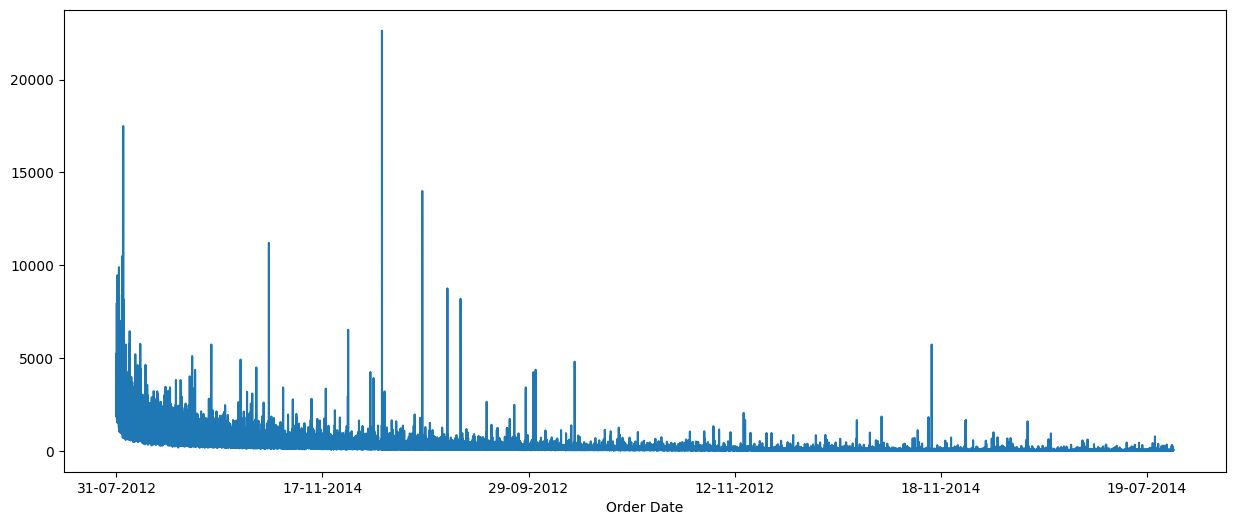

In [ ]:
series = pd.read_csv(r'/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', header=0, index_col=0)
series['Sales'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def Augmented_Dickey_Fuller_Test_func(series, column_name):
    print(f"Results of Dickey-Fuller Test for column: {column_name}")
    dftest = adfuller(series, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def Augmented_Dickey_Fuller_Test_func(series, column_name):
    print(f"Results of Dickey-Fuller Test for column: {column_name}")
    dftest = adfuller(series, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

sales_series = series['Sales']

Augmented_Dickey_Fuller_Test_func(sales_series, 'Sales')


Results of Dickey-Fuller Test for column: Sales
Test Statistic                -8.470601e+00
p-value                        1.481278e-13
Lags Used                      5.800000e+01
Number of Observations Used    5.123100e+04
Critical Value (1%)           -3.430478e+00
Critical Value (5%)           -2.861596e+00
Critical Value (10%)          -2.566800e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


<Axes: xlabel='Order Date'>

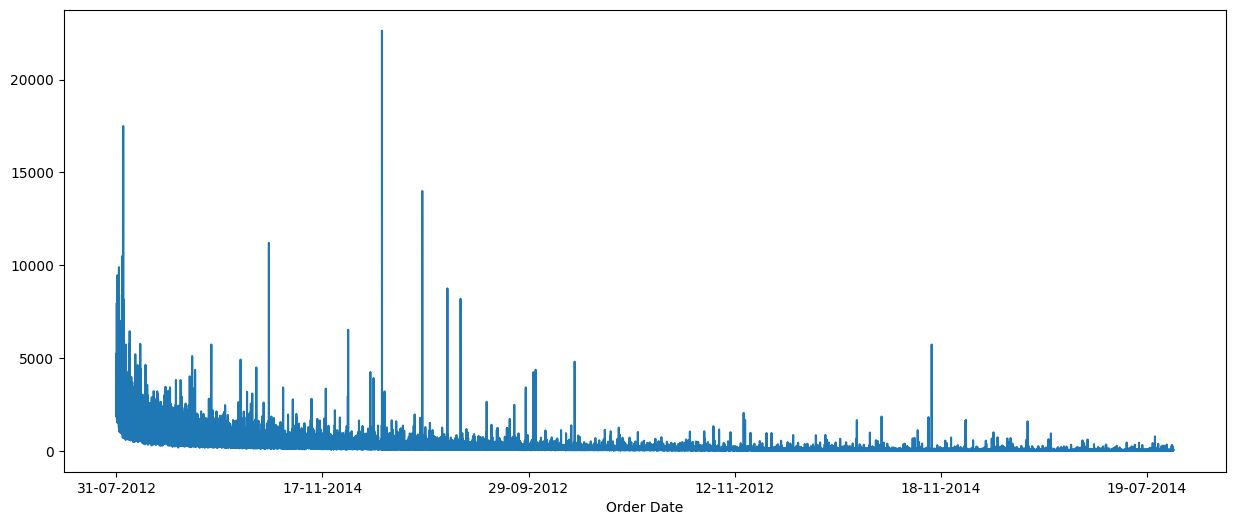

In [ ]:
series['Sales'].plot(figsize=(15,6))

Data is stationary so there is no need of further calculations

Lab 6

In [ ]:
pip install pmdarima

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', parse_dates = True)

In [ ]:
df.head(10)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
5,28-06-2013,Corporate,APAC,2862.675,763.2750
6,07-11-2011,Consumer,APAC,1822.080,564.8400
7,14-04-2012,Consumer,APAC,5244.840,996.4800
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124


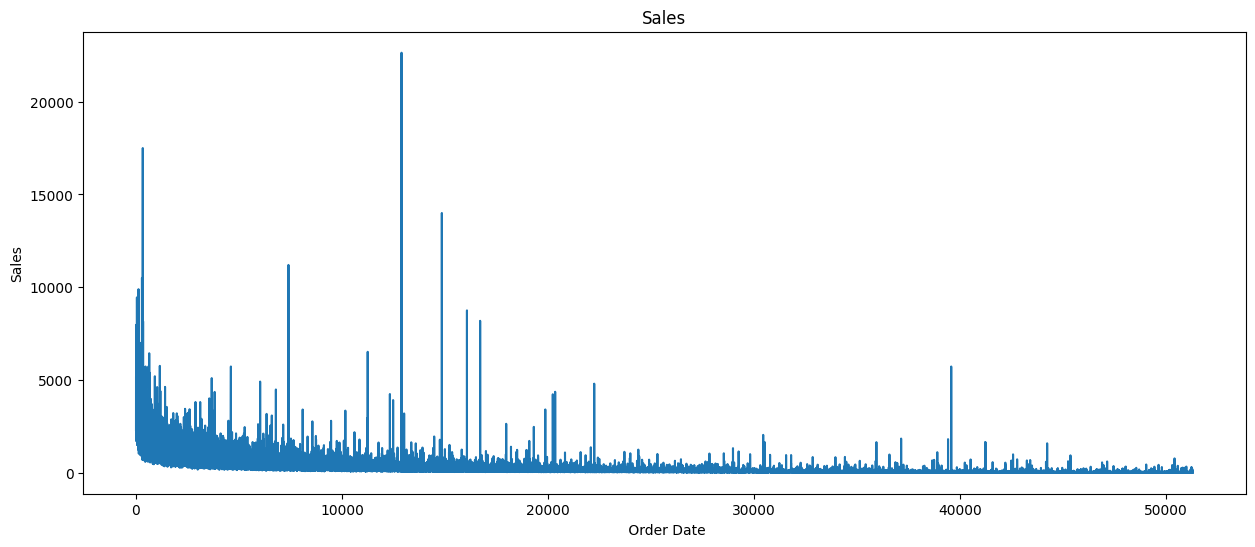

In [ ]:
df["Sales"].plot(figsize=(15, 6))
plt.xlabel(" Order Date")
plt.ylabel("Sales")
plt.title("Sales")
plt.show()

In [ ]:
df_sorted_sales = series.sort_values(by='Sales', ascending=True)
print(df_sorted_sales)

                Segment Market      Sales     Profit
Order Date                                          
20-06-2014     Consumer     US      0.444    -1.1100
03-03-2014    Corporate     US      0.556    -0.9452
22-06-2013    Corporate     US      0.836    -1.3376
31-03-2011     Consumer     US      0.852    -0.5964
26-09-2011    Corporate     US      0.876    -1.4016
...                 ...    ...        ...        ...
18-11-2014     Consumer     US  10499.970  5039.9856
23-10-2014  Home Office     US  11199.968  3919.9888
24-03-2014     Consumer     US  13999.960  6719.9808
03-10-2013    Corporate     US  17499.950  8399.9760
18-03-2011  Home Office     US  22638.480 -1811.0784

[51290 rows x 4 columns]


histogram

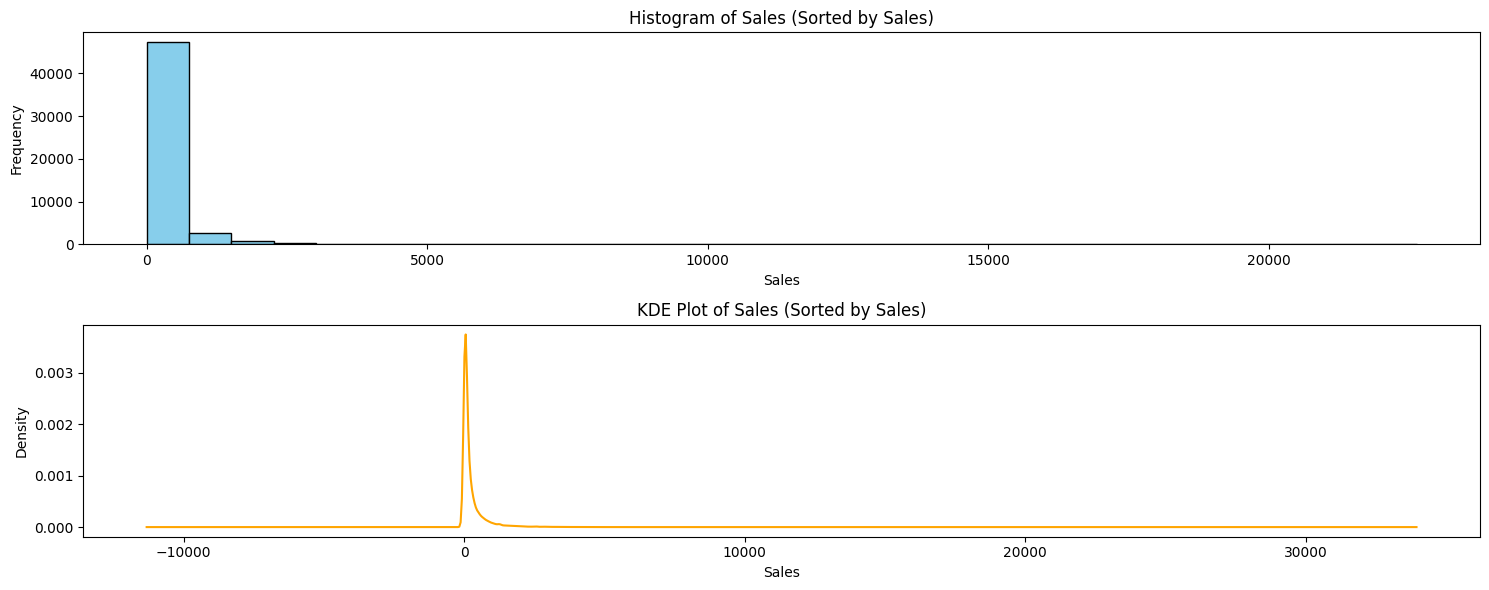

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the Global Superstore dataset and 'Sales' is the column name
# Replace 'df' and 'Sales' with your actual DataFrame and column name
df_sorted_sales = series['Sales'].sort_values(ascending=True).head(51291)  # Sort Sales column and extract 51,291 data points

plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.hist(df_sorted_sales, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales (Sorted by Sales)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
df_sorted_sales.plot(kind='kde', color='orange')
plt.title('KDE Plot of Sales (Sorted by Sales)')
plt.xlabel('Sales')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
X = df[['Sales' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=730543.653, Time=50.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=765565.152, Time=1.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=751583.771, Time=3.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=730542.835, Time=18.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=765563.152, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=730543.583, Time=30.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=730524.522, Time=52.91 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=730505.764, Time=45.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=730505.904, Time=40.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=730498.742, Time=61.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=730507.902, Time=66.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=730495.200, Time=92.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=730500.150, Time=82.89 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=730496.913, Time=94.8

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                51260
Model:               SARIMAX(5, 1, 1)   Log Likelihood             -365234.713
Date:                Mon, 04 Dec 2023   AIC                         730485.426
Time:                        09:06:23   BIC                         730556.183
Sample:                             0   HQIC                        730507.565
                              - 51260                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0644      0.028     -2.293      0.022      -0.119      -0.009
ar.L1         -0.0053      0.002     -3.379      0.001      -0.008      -0.002
ar.L2         -0.0284      0.002    -15.729      0.000      -0.032      -0.025
ar.L3          0.0004      0.001      0.261      0.794      -0.002       0.003
ar.L4         -0.0134      0.002     -6.837      0.000      -0.017      -0.010
ar.L5          0.0183      0.001     14.081      0.000       0.016       0.021
ma.L1         -0.9849      0.000  -3922.325      0.000      -0.985      -0.984
sigma2      9.045e+04     33.425   2705.951      0.000    9.04e+04    9.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        1799224224.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            17.44
Prob(H) (two-sided):                  0.00   Kurtosis:                       920.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['sales_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(51261, 51291)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 1818.8926667330136
MSE is : 25.101362084567075
RMSE is : 42.648477894680056
MAPE is : 217.27661219762444
R2 is : -0.27177494247949663



In [ ]:
forecast["new_index"] = range(51261, 51291)
forecast = forecast.set_index("new_index")

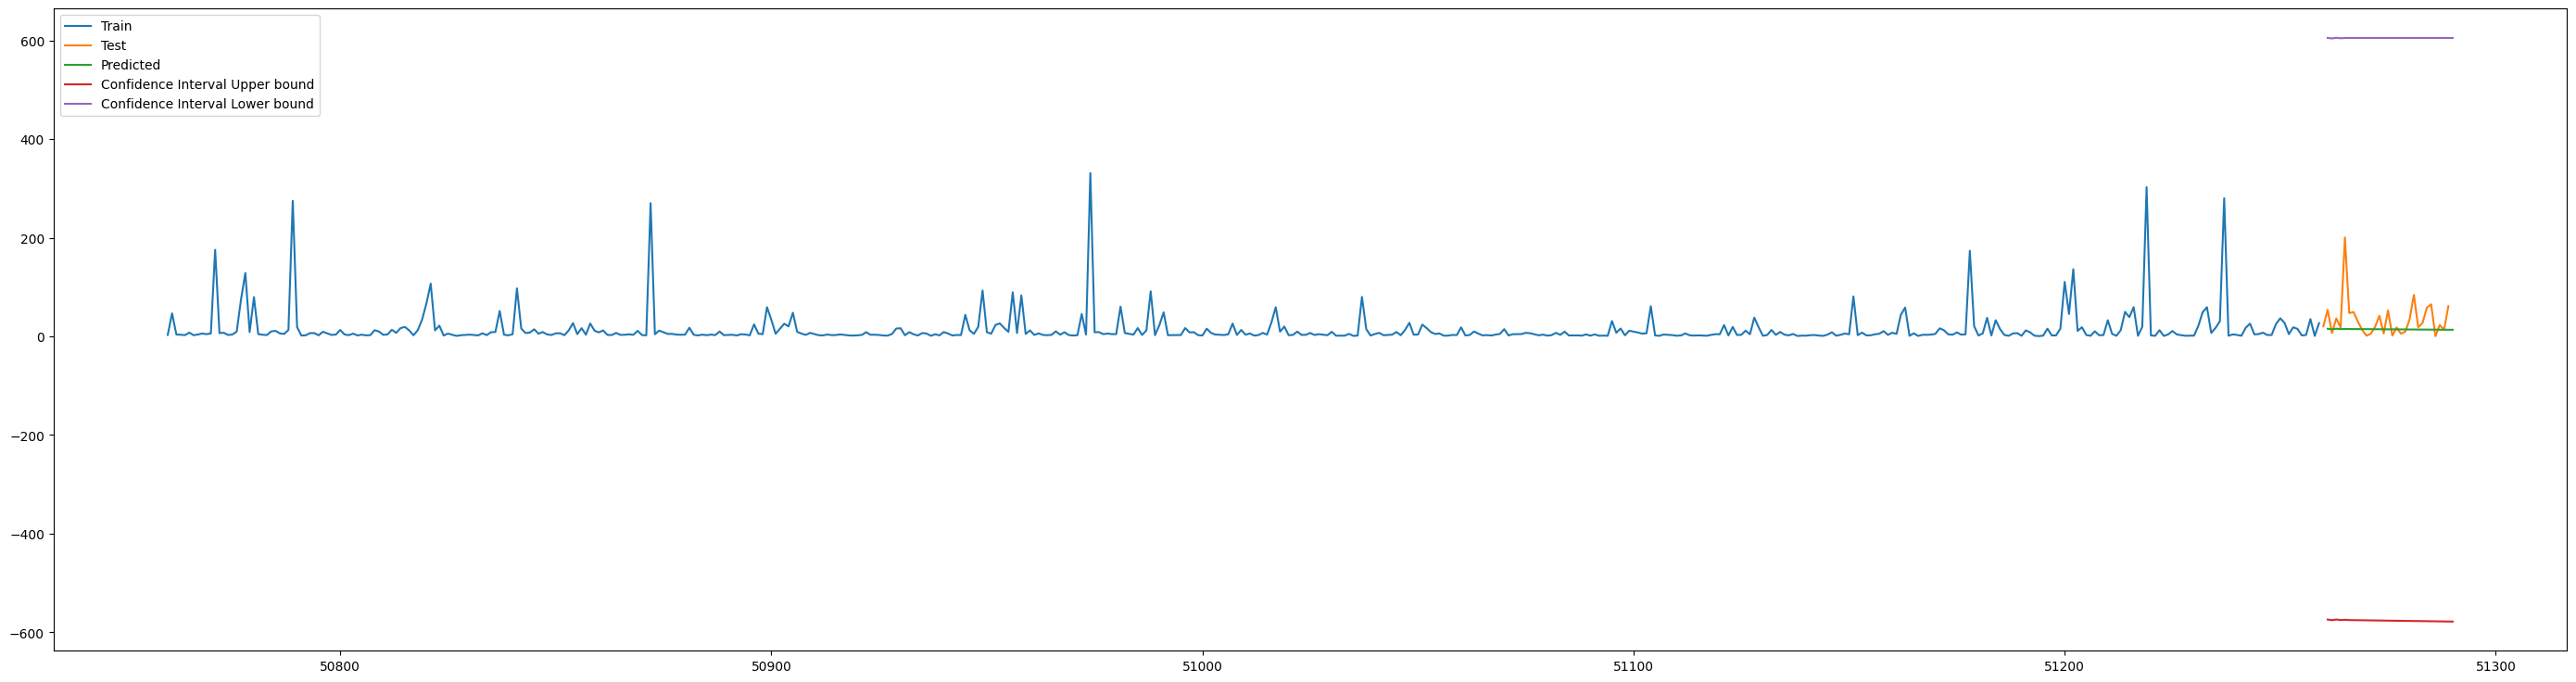

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
train_last_1000 = train[-500:]
test_last_1000 = test[-500:]
forecast_last_1000 = forecast[-500:]
df_conf_last_1000 = df_conf[-500:]

plt.rcParams["figure.figsize"] = [35, 9]
plt.plot(train_last_1000, label='Train')
plt.plot(test_last_1000, label='Test')
plt.plot(forecast_last_1000, label='Predicted')
plt.plot(df_conf_last_1000['Upper_bound'], label='Confidence Interval Upper bound')
plt.plot(df_conf_last_1000['Lower_bound'], label='Confidence Interval Lower bound')
plt.legend(loc='best')
plt.show()


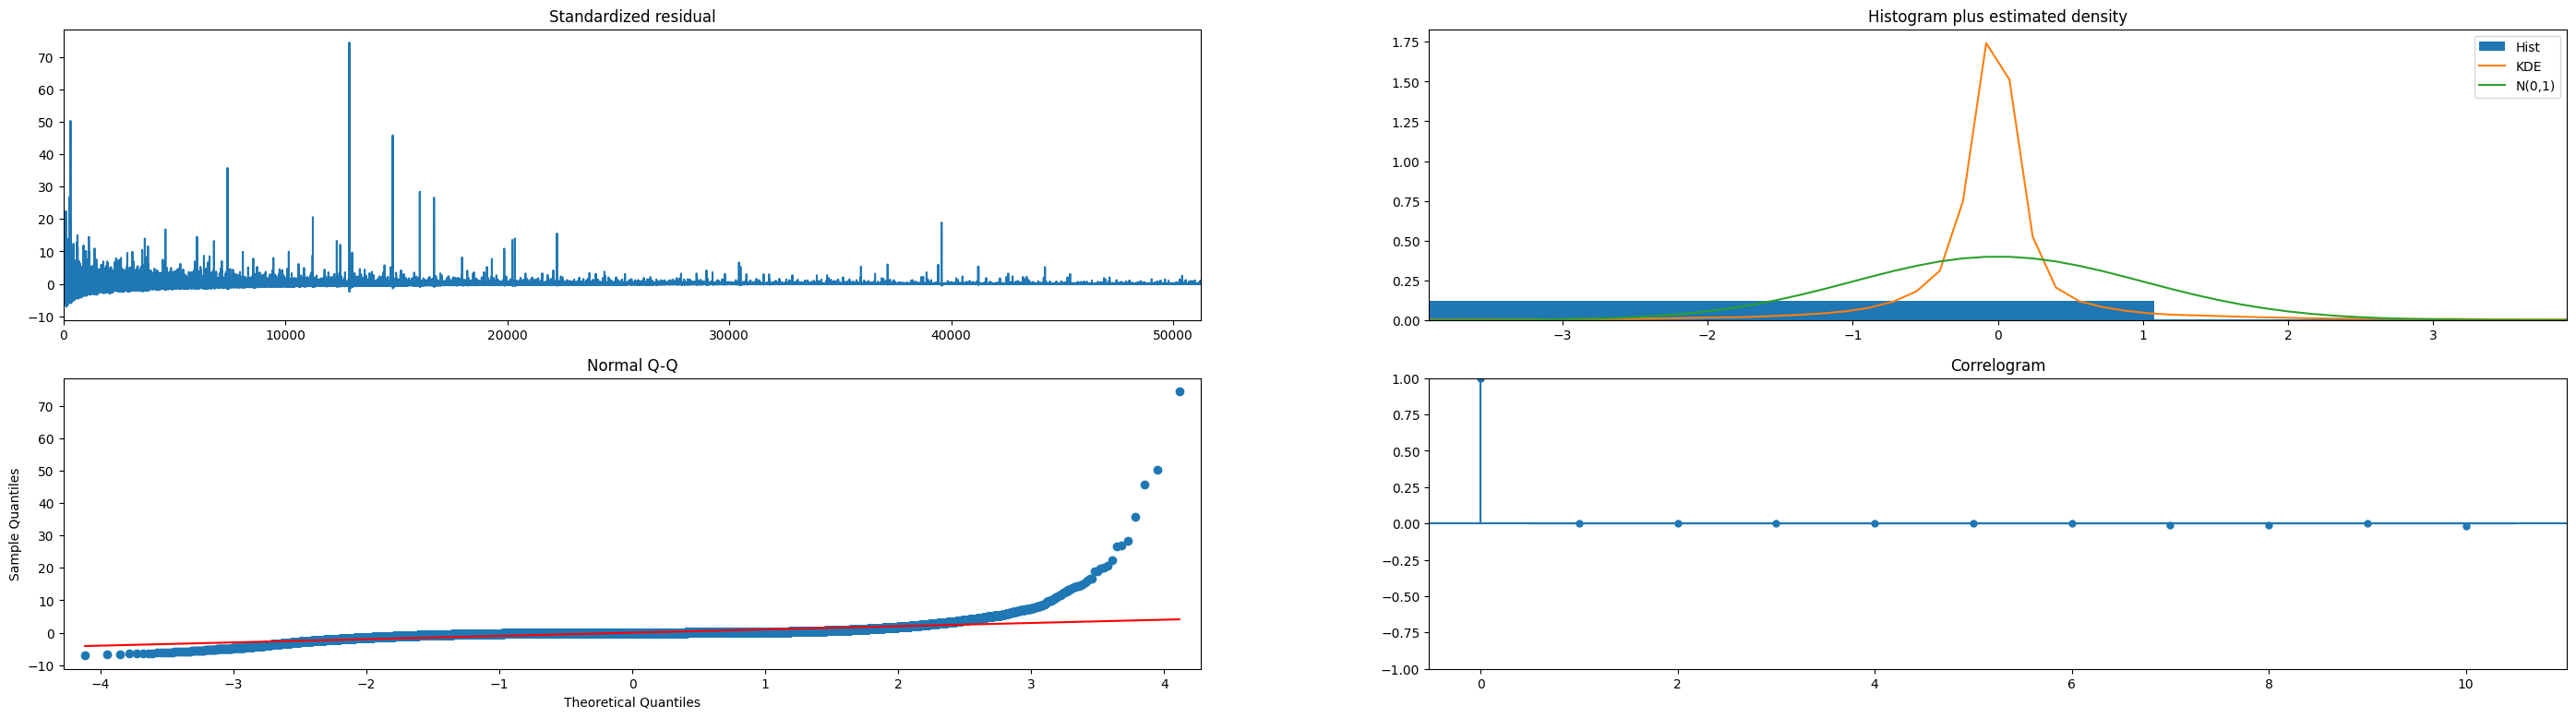

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
forecast

,sales_pred
new_index,
51261,15.480825
51262,14.312907
51263,15.632133
51264,14.617789
51265,15.148107
51266,14.918018
51267,14.800339
51268,14.781051
51269,14.694361


Volitality Modals


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install arch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 13.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0, parse_dates=True)
df.head()

<ipython-input-6-fdbc22fb2021>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/GlobalSuperstoreData.csv', index_col=0, parse_dates=True)


,Segment,Market,Sales,Profit
Order Date,,,,
2012-07-31,Consumer,US,2309.650,762.1845
2013-05-02,Corporate,APAC,3709.395,-288.7650
2013-10-17,Consumer,APAC,5175.171,919.9710
2013-01-28,Home Office,EU,2892.510,-96.5400
2013-05-11,Consumer,Africa,2832.960,311.5200


In [ ]:
from arch import arch_model


In [ ]:
data = pd.DataFrame(df)
new_df = data[['Sales']].reset_index(drop=True)
new_df

,Sales
0,2309.650
1,3709.395
2,5175.171
3,2892.510
4,2832.960
...,...
51285,65.100
51286,0.444
51287,22.920
51288,13.440


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf


 Sales Graph


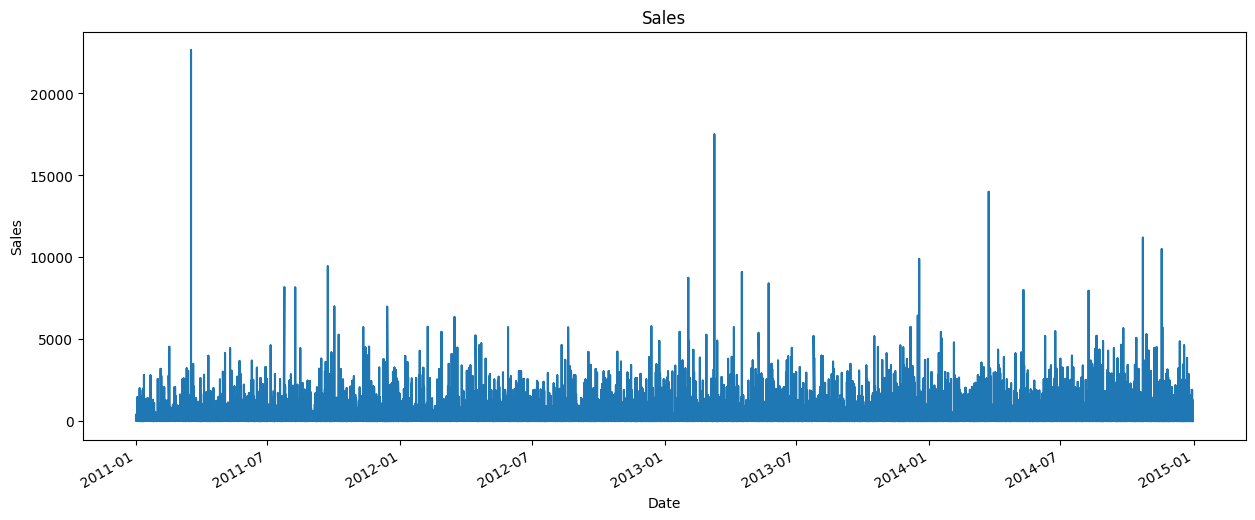


PACF Graph


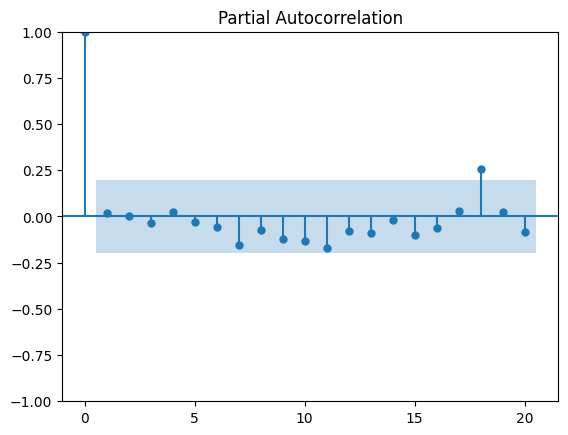

Iteration:      1,   Func. Count:     12,   Neg. LLF: 387.49071790178846
Iteration:      2,   Func. Count:     24,   Neg. LLF: 374.74457912105686
Iteration:      3,   Func. Count:     35,   Neg. LLF: 374.70928716595057
Iteration:      4,   Func. Count:     46,   Neg. LLF: 374.70024155318777
Iteration:      5,   Func. Count:     57,   Neg. LLF: 374.6970749782862
Iteration:      6,   Func. Count:     68,   Neg. LLF: 374.69429333445987
Iteration:      7,   Func. Count:     79,   Neg. LLF: 374.69396853572636
Iteration:      8,   Func. Count:     90,   Neg. LLF: 374.6921876752759
Iteration:      9,   Func. Count:    101,   Neg. LLF: 374.6751883420856
Iteration:     10,   Func. Count:    112,   Neg. LLF: 374.65848554972473
Iteration:     11,   Func. Count:    123,   Neg. LLF: 374.6569275766934
Iteration:     12,   Func. Count:    134,   Neg. LLF: 374.6555822838246
Iteration:     13,   Func. Count:    145,   Neg. LLF: 374.65545648438
Iteration:     14,   Func. Count:    156,   Neg. LLF: 374.6

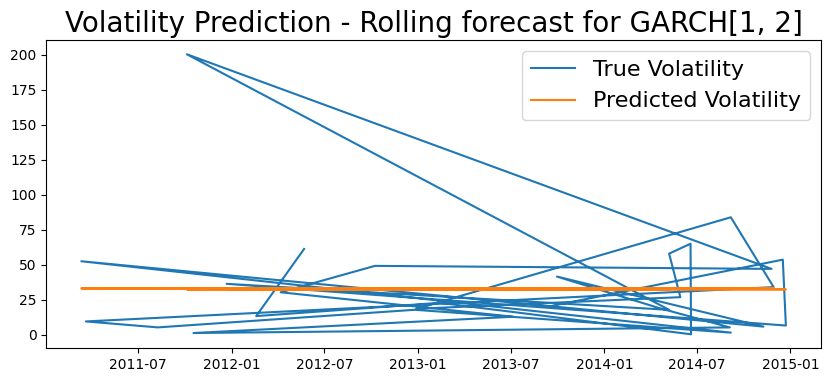

In [ ]:
import matplotlib.pyplot as plt
def exp9(Sales, p, q):
    print("\n", Sales, "Graph")
    df[Sales].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(Sales)
    plt.title(Sales)
    plt.show()

    new_df = df[Sales].iloc[-100:]  # Select the last 1000 points

    print("\nPACF Graph")
    plot_pacf(new_df)
    plt.show()

    test_size = 30
    train, test = new_df[:-test_size], new_df[-test_size:]

    model = arch_model(train, p=p, q=q)
    model_fit = model.fit()
    print(model_fit.summary())
    forecast = model_fit.forecast()

    return forecast

def predict_volatility(Sales, p, q):
    new_df = df[Sales].iloc[-1000:]  # Select the last 1000 points
    rolling_predictions = []
    test_size = 30

    for i in range(test_size):
        train = new_df[:-(test_size-i)]

        model = arch_model(train, p=p, q=q)
        model_fit = model.fit()
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

    rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-test_size:])

    plt.figure(figsize=(10, 4))
    true, = plt.plot(df[Sales].iloc[-test_size:])
    preds, = plt.plot(rolling_predictions)
    plt.title(f'Volatility Prediction - Rolling forecast for GARCH[{p}, {q}]', fontsize=20)
    plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
    plt.show()

    return rolling_predictions

# Example usage:
forecast = exp9("Sales", 1, 7)
print("\nPredicting volatility")
rolling_predictions = predict_volatility("Sales", 1, 2)


In [ ]:
def exp9(Sales,p,q):
  print("\n",Sales, "Graph")
  df[Sales].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(Sales)
  plt.title(Sales)
  plt.show()

  new_df = df[Sales]

  print("\nPACF Graph")
  plot_pacf(new_df)
  plt.show()

  test_size = 30
  train, test = new_df[:-test_size], new_df[-test_size:]

  model = arch_model(train, p=p, q=q)
  model_fit = model.fit(options={'maxiter': 1000})
  print(model_fit.summary())
  forecast = model_fit.forecast()
  # forecast = pd.DataFrame(forecast,columns=['close_pred'])
  return forecast

def predict_volatility(Sales, p, q):
  new_df = df[Sales]
  rolling_predictions = []
  test_size = 30

  for i in range(test_size):
    train = new_df[:-(test_size-i)]

    model = arch_model(train, p=p, q=q)
    model_fit = model.fit(options={'maxiter': 1000, 'disp': 'on'})
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-test_size:])
  # print(rolling_predictions)

  plt.figure(figsize=(10,4))
  true, = plt.plot(df[Sales][-test_size:])
  preds, = plt.plot(rolling_predictions)
  plt.title(f'Volatility Prediction - Rolling forecast for GARCH[{p}, {q}]', fontsize=20)
  plt.legend([ 'True Volatility', 'Predicted Volatility'], fontsize=16)
  return rolling_predictions

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5162.678370394044
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4983.049925350804
Iteration:      3,   Func. Count:     17,   Neg. LLF: 7086.794732180275
Iteration:      4,   Func. Count:     25,   Neg. LLF: 4983.0424068361135
Iteration:      5,   Func. Count:     30,   Neg. LLF: 4983.0414860957635
Iteration:      6,   Func. Count:     35,   Neg. LLF: 4983.041403379557
Iteration:      7,   Func. Count:     40,   Neg. LLF: 4983.040712749447
Iteration:      8,   Func. Count:     45,   Neg. LLF: 4983.037202302268
Iteration:      9,   Func. Count:     50,   Neg. LLF: 4983.019387194512
Iteration:     10,   Func. Count:     55,   Neg. LLF: 4982.932600464297
Iteration:     11,   Func. Count:     60,   Neg. LLF: 4982.532250958395
Iteration:     12,   Func. Count:     65,   Neg. LLF: 4981.34560384951
Iteration:     13,   Func. Count:     70,   Neg. LLF: 4981.113602018488
Iteration:     14,   Func. Count:     75,   Neg. LLF: 4981.0960

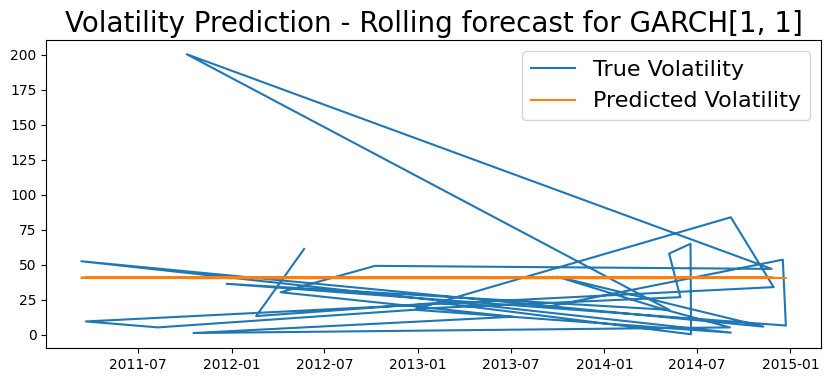

Iteration:      1,   Func. Count:      7,   Neg. LLF: 27605.56902320972
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4924.1419237337095
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4957.154413572627
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4922.614868790726
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4920.54121432388
Iteration:      6,   Func. Count:     44,   Neg. LLF: 4919.728307741707
Iteration:      7,   Func. Count:     50,   Neg. LLF: 5754.5029490854085
Iteration:      8,   Func. Count:     58,   Neg. LLF: 4942.3459487790105
Iteration:      9,   Func. Count:     65,   Neg. LLF: 4920.656127214713
Iteration:     10,   Func. Count:     72,   Neg. LLF: 4921.123583637662
Iteration:     11,   Func. Count:     79,   Neg. LLF: 5628.64771929954
Iteration:     12,   Func. Count:     88,   Neg. LLF: 4920.004721884734
Iteration:     13,   Func. Count:     95,   Neg. LLF: 4919.432198886176
Iteration:     14,   Func. Count:    102,   Neg. LLF: 4919.4143

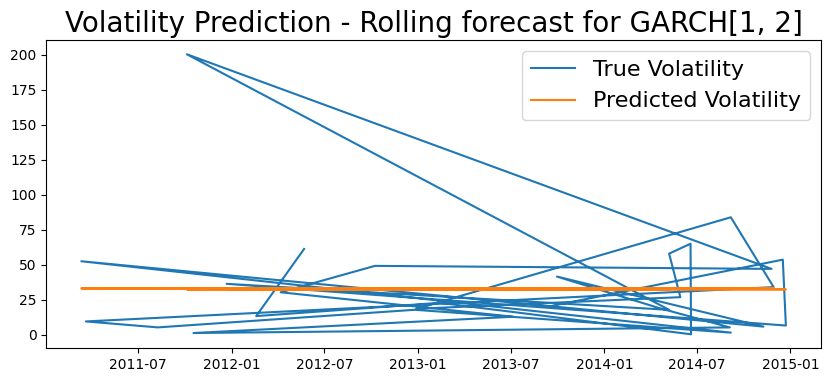

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5162.6759693017975
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4983.051448807699
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7086.794821094504
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4983.042864235866
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4983.041705052466
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4983.04138306483
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4983.040748463345
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4983.037498129055
Iteration:      9,   Func. Count:     59,   Neg. LLF: 4983.021095532156
Iteration:     10,   Func. Count:     65,   Neg. LLF: 4982.939015876259
Iteration:     11,   Func. Count:     71,   Neg. LLF: 4982.566903228838
Iteration:     12,   Func. Count:     77,   Neg. LLF: 4981.40547549972
Iteration:     13,   Func. Count:     83,   Neg. LLF: 4981.111643815829
Iteration:     14,   Func. Count:     89,   Neg. LLF: 4981.094616

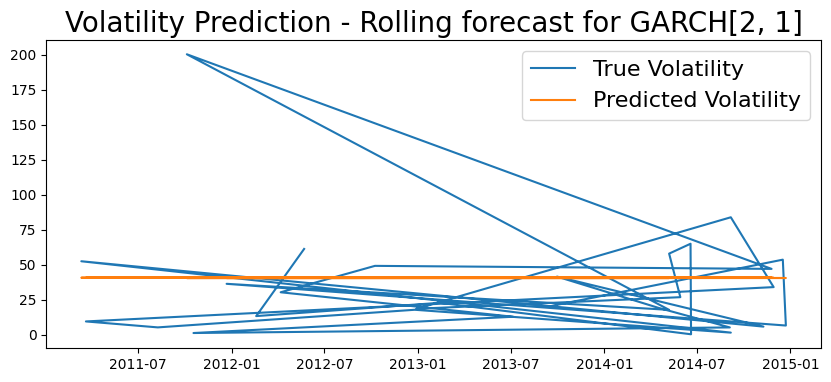

Iteration:      1,   Func. Count:      8,   Neg. LLF: 27635.525560358805
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4923.924740405784
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4972.465545971506
Iteration:      4,   Func. Count:     33,   Neg. LLF: 4925.569026351697
Iteration:      5,   Func. Count:     41,   Neg. LLF: 4920.520580111572
Iteration:      6,   Func. Count:     48,   Neg. LLF: 4919.45055747483
Iteration:      7,   Func. Count:     55,   Neg. LLF: 4919.461894783504
Iteration:      8,   Func. Count:     63,   Neg. LLF: 39200.87630260792
Iteration:      9,   Func. Count:     74,   Neg. LLF: 4937.6284464232485
Iteration:     10,   Func. Count:     83,   Neg. LLF: 5637.739140808287
Iteration:     11,   Func. Count:     93,   Neg. LLF: 4919.7532503322755
Iteration:     12,   Func. Count:    101,   Neg. LLF: 39223.68164751749
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4956.162881202265
Optimization terminated successfully    (Exit mode 0)
        

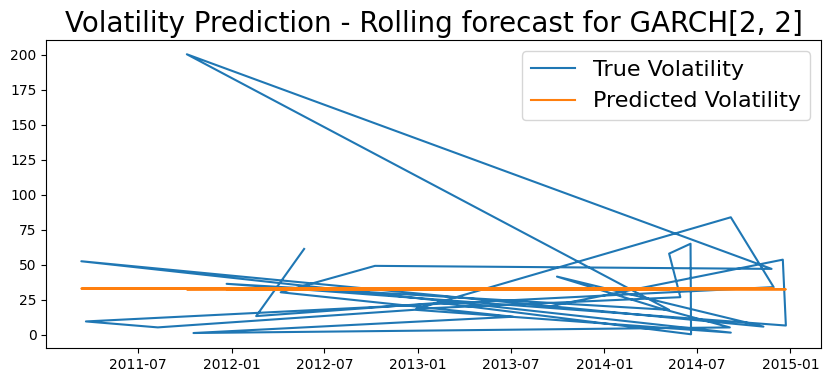

In [ ]:
for i in range(2):
  for j in range(2):
    predict_volatility("Sales", i+1, j+1)

The next predicted value for the sequence is:
[[35.29459]]
Forecasted values for the next 10 steps:
[33.406418, 4.287216, 18.62498, 35.29459]


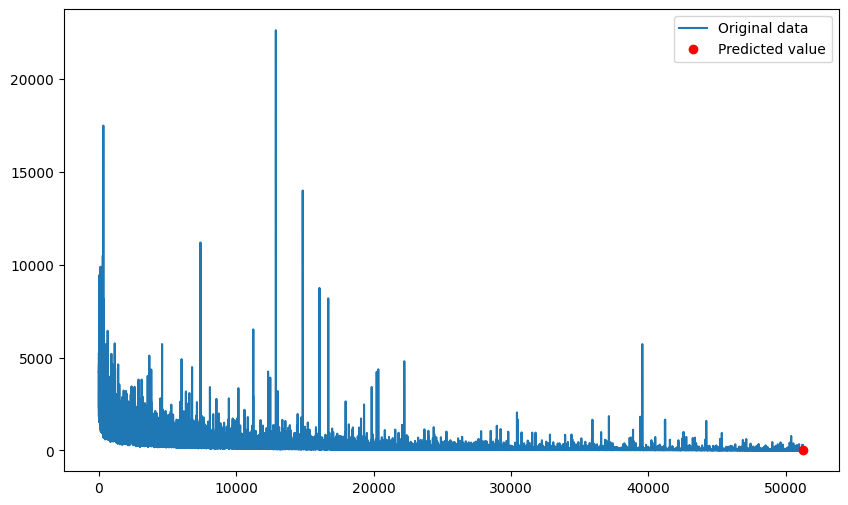

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the Global Superstore dataset
# Replace 'df' with your actual DataFrame containing the 'Sales' column
sales_data = df['Sales'].values  # Replace 'Sales' with your actual column name

def split_sequence(sequence, steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

steps = 3
X, y = split_sequence(sales_data, steps)

features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, verbose=0)

x_input = sales_data[-steps:].reshape((1, steps, features))
y_pred = model.predict(x_input, verbose=0)

print("The next predicted value for the sequence is:")
print(y_pred)

fore = []
for i in range(len(sales_data) - steps, len(sales_data) + 1):  # Adjusted loop range
    if i >= steps:  # Check if there are enough preceding steps for prediction
        x_input = sales_data[i - steps:i].reshape((1, steps, features))
        y_pred = model.predict(x_input, verbose=0)
        fore.append(y_pred[0][0])

print("Forecasted values for the next 10 steps:")
print(fore)

# Plotting the original and predicted values
plt.figure(figsize=(10, 6))
plt.plot(sales_data, label='Original data')
plt.plot(len(sales_data) - 1, y_pred[0][0], 'ro', label='Predicted value')
plt.legend()
plt.show()
